<img src="images/logoitam.gif">

# Maestría en Ciencia de Datos
## Regresión Lineal Perceptrón

* Machine Learning | Tarea 06 | 06 de octubre de 2016 |
* Alumnas: 
        - Gabriela Flores Bracamontes | Clave: 160124 |
        - Guillermina Montanari Luján | Clave: 101421 |
        - Paulina Salgado Figueroa    | Clave: 160314 |

## Instrucciones
* Modifique su algoritmo de regresión lineal iterativa cambiando la función de salida a la fn escalón, i.e. Implemente g
* Entrene un Perceptrón para modelar los datos de reglin4.csv como un problema de clasificación
* Grafique la barrera de decisión
<img src="images/perceptron.png">

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import random as rnd
import os 
import math
import matplotlib.pyplot
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
def salida(w0,w,X):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X.iloc[i]
    return suma

def entrena(w0,w,X_train,Y_train, tpo_outfun=0):
    """
    Metodo de entrenamiento de gradiente descendente sin regularización de ridge
    Recibe una w0 y un vector de w iniciales 
    Recibe una matriz de valores que contienen las variables independientes por columna
    Recibe un vector con las observaciones de la variable dependiente
    Recibe el tipo de función de salida que va a utilizar
    """
    eta = 0.1
    observaciones = len(X_train)
    #### Por cada nuevo valor que me va llegando calculo mis nuevas w's considerando el error de predicción usando las w's actuales
    for i in range(observaciones):
        if (tpo_outfun==0):
            sal = salida(w0,w,X_train.iloc[i,0:len(X_train.columns)])
        else:
            sal = salida_escalon(w0,w,X_train.iloc[i,0:len(X_train.columns)])
        #### Calculo el error de predicción de y gorro
        error = Y_train.iloc[i] - sal
        ###Actualizo mi w0        
        w0 = w0 + eta*error
        columnasdatos = len(X_train.columns)
        ### Actualizo mis w's
        for j in range(columnasdatos):
            w[j] = w[j] + eta*error*X_train.iloc[i,j]
    ### Regreso las w0 y w's wue calcule al final
    return w0,w

def entrena_regularizado(w0,w,X_train,Y_train,lam):
    eta = 0.1
    observaciones = len(X_train)
    for i in range(observaciones):
        sal = salida(w0,w,X_train.iloc[i,0:len(X_train.columns)])
        error = Y_train.iloc[i] - sal
        w0 = w0 + eta*error - lam*w0
        columnasdatos = len(X_train.columns)
        for j in range(columnasdatos):
            w[j] = w[j] + eta*error*X_train.iloc[i,j] - lam*w[j]
    return w0,w

def salida_escalon(w0,w,X):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X.iloc[i]
    if suma > 0:
        res = 1
    else:
        res = 0
    return res


## 1.- Obtención de datos y análisis exploratorio

In [3]:
data = pd.read_csv("regLin4.csv")
data.describe()

,X,y
count,1029.000000,1029.000000
mean,48.589544,0.325559
std,29.227099,0.468811
min,0.110611,0.000000
25%,22.625683,0.000000
50%,46.887538,0.000000
75%,74.247858,1.000000
max,99.983493,1.000000


In [19]:
data.head()

,X,y
0,71.130300,0
1,36.872465,0
2,56.508402,0
3,78.120147,0
4,65.575073,0


## 2.- Preprocesamiento y separación de los datos

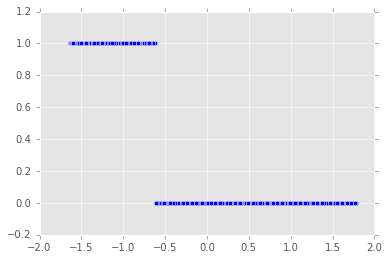

In [5]:
## Separamos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(data[["X"]],data["y"], train_size=0.75)

# Estandarizamos los datos de X, la y no importa pq sus valores están entre 0 y 1
ScaleX = preprocessing.StandardScaler()
ScaleX.fit(X_train)
X_train = pd.DataFrame(data = ScaleX.transform(X_train), columns = ['X'])

## Ploteamos los datos
plt.scatter(X_train,Y_train)

In [6]:
##Iniciamos los vectores iniciales de w0 y w's'
w0_ini = rnd.random()
w_ini = [rnd.random()]

## Entreamos los pesos sin regularización
w0_fin, w_fin = entrena(w0_ini,w_ini,X_train,Y_train)

## Obtenemos lambda
lam= -w0_fin/w_fin[0]

In [7]:
w_fin

[-0.33084346746020638]

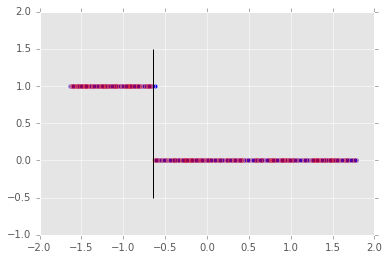

In [8]:
Y_Predicted = []


for l in range(len(X_train)):
    suma = w0_fin + w_fin[0]*X_train.iloc[l,0]
    if suma > 0:
        res = 1
    else:
        res = 0
    Y_Predicted = Y_Predicted + [res] 

plt.scatter(X_train,Y_train)
plt.scatter(X_train, Y_Predicted, color = "red", alpha = 0.05)
plt.vlines([lam],-.5,1.5,color="black")

## Entrenamos un Perceptrón para calcular la función “and” de dos variables

In [9]:
p1 = pd.read_csv("and.csv")
X_train, X_test, Y_train, Y_test = train_test_split(p1[['x1','x2']],p1[['y']], train_size=0.75)
#Si escalamos los datos
scaleX = preprocessing.StandardScaler()
scaleX.fit(X_train)
X_train=scaleX.transform(X_train)
X_test=scaleX.transform(X_test)

In [11]:
w0i = rnd.random()
w1i = rnd.random()
w2i = rnd.random()
w = []
error_w3 = 0
y_esta3 = 0


def entrena(x,y,w0,w1,w2,eta):
    z = 0
    while (z<1000):
        z = z + 1
        for i in range(len(x)):
            if (w0 + w1*x[i][0]+w2*x[i][1] ) > 0:
                y_esta3 = 1
                error_w3 = y.values[i] - y_esta3
            else:
                y_esta3 = 0
                error_w3 = y.values[i] - y_esta3
            w0 = w0 + error_w3*eta
            w1= w1 + error_w3*eta*x[i][0]
            w2 = w2 + error_w3*eta*x[i][1]
    w.append(w0)
    w.append(w1)
    w.append(w2)

entrena(X_train,Y_train,w0i,w1i,w2i,0.8)

w0a = w[0]
w1a = w[1]
w2a = w[2]
error3 = []
error = []
y_estimada3 = []

def salida(k,z,w0,w1,w2):
    for r in range(len(k)):
        y_estn3 = w0 + w1*k[r][0] + w2*k[r][1]
        if y_estn3 > 0:
            y_estn3 = 1
        else:
            y_estn3 = 0
        error_a3 = z.values[r] - y_estn3
        error.append(error_a3)
        y_estimada3.append(y_estn3)

salida(X_test,Y_test,w0a,w1a,w2a)

print(w0a),
print(w1a),
print(w2a)

[-0.43048645]
[ 1.26413277]
[ 1.53620806]


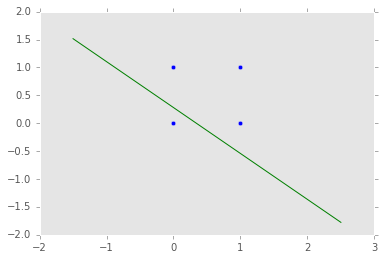

In [12]:
plt.scatter(p1.x1,p1.x2)
x=np.linspace(-1.5,2.5,258)
plt.plot(x,-x*w1a/w2a-w0a/w2a,color='green')
plt.grid()

## Entrene un Perceptrón para calcular la función “or” de dos variables

In [13]:
p2 = pd.read_csv("or.csv")
X_train, X_test, Y_train, Y_test = train_test_split(p2[['x1','x2']],p2[['y']], train_size=0.75)
#Si escalamos los datos
scaleX = preprocessing.StandardScaler()
scaleX.fit(X_train)
X_train=scaleX.transform(X_train)
X_test=scaleX.transform(X_test)

In [16]:
w0i = rnd.random()
w1i = rnd.random()
w2i = rnd.random()
w = []
error_w3 = 0
y_esta3 = 0


def entrena(x,y,w0,w1,w2,eta):
    z = 0
    while (z<1000):
        z = z + 1
        for i in range(len(x)):
            if (w0 + w1*x[i][0]+w2*x[i][1] ) > 0:
                y_esta3 = 1
                error_w3 = y.values[i] - y_esta3
            else:
                y_esta3 = 0
                error_w3 = y.values[i] - y_esta3
            w0 = w0 + error_w3*eta
            w1= w1 + error_w3*eta*x[i][0]
            w2 = w2 + error_w3*eta*x[i][1]
    w.append(w0)
    w.append(w1)
    w.append(w2)

entrena(X_train,Y_train,w0i,w1i,w2i,0.5)

w0a = w[0]
w1a = w[1]
w2a = w[2]
error3 = []
y_estimada3 = []

def salida(k,z,w0,w1,w2):
    for r in range(len(k)):
        y_estn3 = w0 + w1*k[r][0] + w2*k[r][1]
        if y_estn3 > 0:
            y_estn3 = 1
        else:
            y_estn3 = 0
        error_a3 = z.values[r] - y_estn3
        error.append(error_a3)
        y_estimada3.append(y_estn3)

salida(X_test,Y_test,w0a,w1a,w2a)

print(w0a),
print(w1a),
print(w2a)

[ 0.76204535]
[ 0.98792436]
[ 1.25338821]


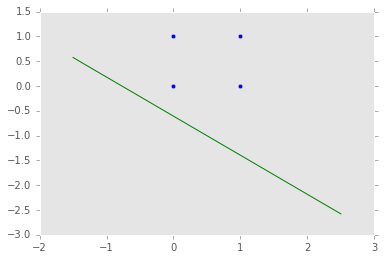

In [17]:
plt.scatter(p2.x1,p2.x2)
x=np.linspace(-1.5,2.5,258)
plt.plot(x,-x*w1a/w2a-w0a/w2a,color='green')
plt.grid()